# Pandas Basics

In this section of the course we will learn how to use pandas for data analysis. You can think of pandas as an extremely powerful version of Excel, with a lot more features.


## Series

The first main data type we will learn about for pandas is the Series data type. Let's import Pandas and explore the Series object.

A Series is very similar to a NumPy array (in fact it is built on top of the NumPy array object). What differentiates the NumPy array from a Series, is that a Series can have axis labels, meaning it can be indexed by a label, instead of just a number location. It also doesn't need to hold numeric data, it can hold any arbitrary Python Object.

Let's explore this concept through some examples:

In [1]:
import numpy as np
import pandas as pd

### Creating a Series

You can convert a list,numpy array, or dictionary to a Series:

In [2]:
labels = ['a','b','c']
my_list = [10,20,30]
arr = np.array([10,20,30])
d = {'a':10,'b':20,'c':30}

**Using Lists**

In [3]:
pd.Series(data=my_list)

0    10
1    20
2    30
dtype: int64

In [4]:
pd.Series(data=my_list,index=labels)

a    10
b    20
c    30
dtype: int64

In [5]:
pd.Series(my_list,labels)

a    10
b    20
c    30
dtype: int64

**NumPy Arrays**

In [6]:
pd.Series(arr)

0    10
1    20
2    30
dtype: int32

In [7]:
pd.Series(arr,labels)

a    10
b    20
c    30
dtype: int32

**Dictionary**

In [8]:
pd.Series(d)

a    10
b    20
c    30
dtype: int64

### Data in a Series

A pandas Series can hold a variety of object types:

In [9]:
pd.Series(data=labels)

0    a
1    b
2    c
dtype: object

## Using an Index

The key to using a Series is understanding its index. Pandas makes use of these index names or numbers by allowing for fast look ups of information (works like a hash table or dictionary).

Let's see some examples of how to grab information from a Series. Let us create two sereis, ser1 and ser2:

In [10]:
ser1 = pd.Series([1,2,3,4],index = ['USA', 'Germany','USSR', 'Japan'])                                   

In [11]:
ser1

USA        1
Germany    2
USSR       3
Japan      4
dtype: int64

In [12]:
ser1['USA']

1

In [13]:
ser2 = pd.Series([1,2,3,4],index = ['USA', 'Germany', 'Japan', 'Italy'])                                   

Operations are then also done based off of index:

In [14]:
ser1 + ser2

Germany    4.0
Italy      NaN
Japan      7.0
USA        2.0
USSR       NaN
dtype: float64

# DataFrames

DataFrames are the workhorse of pandas and are directly inspired by the R programming language. We can think of a DataFrame as a bunch of Series objects put together to share the same index. Let's use pandas to explore this topic!

In [15]:
from numpy.random import randn
np.random.seed(101)

In [16]:
df = pd.DataFrame(randn(5,4),index='A B C D E'.split(),columns='W X Y Z'.split())

In [17]:
df

,W,X,Y,Z
A,2.706850,0.628133,0.907969,0.503826
B,0.651118,-0.319318,-0.848077,0.605965
C,-2.018168,0.740122,0.528813,-0.589001
D,0.188695,-0.758872,-0.933237,0.955057
E,0.190794,1.978757,2.605967,0.683509


## Selection and Indexing

Let's learn the various methods to grab data from a DataFrame

In [18]:
df['W']

A    2.706850
B    0.651118
C   -2.018168
D    0.188695
E    0.190794
Name: W, dtype: float64

In [19]:
# Pass a list of column names
df[['W','Z']]

,W,Z
A,2.706850,0.503826
B,0.651118,0.605965
C,-2.018168,-0.589001
D,0.188695,0.955057
E,0.190794,0.683509


In [20]:
# SQL Syntax (NOT RECOMMENDED!)
df.W

A    2.706850
B    0.651118
C   -2.018168
D    0.188695
E    0.190794
Name: W, dtype: float64

DataFrame Columns are just Series

In [21]:
type(df['W'])

pandas.core.series.Series

**Creating a new column:**

In [22]:
df['new'] = df['W'] + df['Y']

In [23]:
df

,W,X,Y,Z,new
A,2.706850,0.628133,0.907969,0.503826,3.614819
B,0.651118,-0.319318,-0.848077,0.605965,-0.196959
C,-2.018168,0.740122,0.528813,-0.589001,-1.489355
D,0.188695,-0.758872,-0.933237,0.955057,-0.744542
E,0.190794,1.978757,2.605967,0.683509,2.796762


**Removing Columns**

In [24]:
df.drop('new',axis=1)

,W,X,Y,Z
A,2.706850,0.628133,0.907969,0.503826
B,0.651118,-0.319318,-0.848077,0.605965
C,-2.018168,0.740122,0.528813,-0.589001
D,0.188695,-0.758872,-0.933237,0.955057
E,0.190794,1.978757,2.605967,0.683509


In [25]:
# Not inplace unless specified!
df

,W,X,Y,Z,new
A,2.706850,0.628133,0.907969,0.503826,3.614819
B,0.651118,-0.319318,-0.848077,0.605965,-0.196959
C,-2.018168,0.740122,0.528813,-0.589001,-1.489355
D,0.188695,-0.758872,-0.933237,0.955057,-0.744542
E,0.190794,1.978757,2.605967,0.683509,2.796762


In [26]:
df.drop('new',axis=1,inplace=True)

In [27]:
df

,W,X,Y,Z
A,2.706850,0.628133,0.907969,0.503826
B,0.651118,-0.319318,-0.848077,0.605965
C,-2.018168,0.740122,0.528813,-0.589001
D,0.188695,-0.758872,-0.933237,0.955057
E,0.190794,1.978757,2.605967,0.683509


Can also drop rows this way:

In [28]:
df.drop('E',axis=0)

,W,X,Y,Z
A,2.706850,0.628133,0.907969,0.503826
B,0.651118,-0.319318,-0.848077,0.605965
C,-2.018168,0.740122,0.528813,-0.589001
D,0.188695,-0.758872,-0.933237,0.955057


**Selecting Rows**

In [29]:
df.loc['A']

W    2.706850
X    0.628133
Y    0.907969
Z    0.503826
Name: A, dtype: float64

Or select based off of position instead of label 

In [30]:
df.iloc[2]

W   -2.018168
X    0.740122
Y    0.528813
Z   -0.589001
Name: C, dtype: float64

**Selecting subset of rows and columns**

In [31]:
df.loc['B','Y']

-0.8480769834036315

In [32]:
df.loc[['A','B'],['W','Y']]

,W,Y
A,2.706850,0.907969
B,0.651118,-0.848077


### Conditional Selection

An important feature of pandas is conditional selection using bracket notation, very similar to numpy:

In [33]:
df

,W,X,Y,Z
A,2.706850,0.628133,0.907969,0.503826
B,0.651118,-0.319318,-0.848077,0.605965
C,-2.018168,0.740122,0.528813,-0.589001
D,0.188695,-0.758872,-0.933237,0.955057
E,0.190794,1.978757,2.605967,0.683509


In [34]:
df>0

,W,X,Y,Z
A,True,True,True,True
B,True,False,False,True
C,False,True,True,False
D,True,False,False,True
E,True,True,True,True


In [35]:
df[df>0]

,W,X,Y,Z
A,2.706850,0.628133,0.907969,0.503826
B,0.651118,NaN,NaN,0.605965
C,NaN,0.740122,0.528813,NaN
D,0.188695,NaN,NaN,0.955057
E,0.190794,1.978757,2.605967,0.683509


In [36]:
df[df['W']>0]

,W,X,Y,Z
A,2.706850,0.628133,0.907969,0.503826
B,0.651118,-0.319318,-0.848077,0.605965
D,0.188695,-0.758872,-0.933237,0.955057
E,0.190794,1.978757,2.605967,0.683509


In [37]:
df[df['W']>1]['Y']

A    0.907969
Name: Y, dtype: float64

In [38]:
df[df['W']>0][['Y','X']]

,Y,X
A,0.907969,0.628133
B,-0.848077,-0.319318
D,-0.933237,-0.758872
E,2.605967,1.978757


For two conditions you can use | and & with parenthesis:

In [39]:
df[(df['W']>0) & (df['Y'] > 1)]

,W,X,Y,Z
E,0.190794,1.978757,2.605967,0.683509


## More Index Details

Let's discuss some more features of indexing, including resetting the index or setting it something else.

In [40]:
df

,W,X,Y,Z
A,2.706850,0.628133,0.907969,0.503826
B,0.651118,-0.319318,-0.848077,0.605965
C,-2.018168,0.740122,0.528813,-0.589001
D,0.188695,-0.758872,-0.933237,0.955057
E,0.190794,1.978757,2.605967,0.683509


In [41]:
# Reset to default 0,1...n index
df.reset_index()

,index,W,X,Y,Z
0,A,2.706850,0.628133,0.907969,0.503826
1,B,0.651118,-0.319318,-0.848077,0.605965
2,C,-2.018168,0.740122,0.528813,-0.589001
3,D,0.188695,-0.758872,-0.933237,0.955057
4,E,0.190794,1.978757,2.605967,0.683509


In [42]:
newind = 'CA NY WY OR CO'.split()

In [43]:
df['States'] = newind

In [44]:
df

,W,X,Y,Z,States
A,2.706850,0.628133,0.907969,0.503826,CA
B,0.651118,-0.319318,-0.848077,0.605965,NY
C,-2.018168,0.740122,0.528813,-0.589001,WY
D,0.188695,-0.758872,-0.933237,0.955057,OR
E,0.190794,1.978757,2.605967,0.683509,CO


In [45]:
df.set_index('States')

,W,X,Y,Z
States,,,,
CA,2.706850,0.628133,0.907969,0.503826
NY,0.651118,-0.319318,-0.848077,0.605965
WY,-2.018168,0.740122,0.528813,-0.589001
OR,0.188695,-0.758872,-0.933237,0.955057
CO,0.190794,1.978757,2.605967,0.683509


In [46]:
df

,W,X,Y,Z,States
A,2.706850,0.628133,0.907969,0.503826,CA
B,0.651118,-0.319318,-0.848077,0.605965,NY
C,-2.018168,0.740122,0.528813,-0.589001,WY
D,0.188695,-0.758872,-0.933237,0.955057,OR
E,0.190794,1.978757,2.605967,0.683509,CO


In [47]:
df.set_index('States',inplace=True)

In [48]:
df

,W,X,Y,Z
States,,,,
CA,2.706850,0.628133,0.907969,0.503826
NY,0.651118,-0.319318,-0.848077,0.605965
WY,-2.018168,0.740122,0.528813,-0.589001
OR,0.188695,-0.758872,-0.933237,0.955057
CO,0.190794,1.978757,2.605967,0.683509


# Operations

There are lots of operations with pandas that will be really useful to you, but don't fall into any distinct category. Let's show them here in this lecture:

In [49]:
df = pd.DataFrame({'col1':[1,2,3,4],'col2':[444,555,666,444],'col3':['abc','def','ghi','xyz']})
df.head()

,col1,col2,col3
0,1,444,abc
1,2,555,def
2,3,666,ghi
3,4,444,xyz


### Info on Unique Values

In [50]:
df['col2'].unique()

array([444, 555, 666], dtype=int64)

In [51]:
df['col2'].nunique()

3

In [52]:
df['col2'].value_counts()

444    2
555    1
666    1
Name: col2, dtype: int64

### Selecting Data

In [53]:
#Select from DataFrame using criteria from multiple columns
newdf = df[(df['col1']>2) & (df['col2']==444)]

In [54]:
newdf

,col1,col2,col3
3,4,444,xyz


### Applying Functions

In [55]:
def times2(x):
    return x*2

In [56]:
df['col1'].apply(times2)

0    2
1    4
2    6
3    8
Name: col1, dtype: int64

In [57]:
df['col3'].apply(len)

0    3
1    3
2    3
3    3
Name: col3, dtype: int64

In [58]:
df['col1'].sum()

10

**Permanently Removing a Column**

In [59]:
del df['col1']

In [60]:
df

,col2,col3
0,444,abc
1,555,def
2,666,ghi
3,444,xyz


**Get column and index names:**

In [61]:
df.columns

Index(['col2', 'col3'], dtype='object')

In [62]:
df.index

RangeIndex(start=0, stop=4, step=1)

**Sorting and Ordering a DataFrame:**

In [63]:
df

,col2,col3
0,444,abc
1,555,def
2,666,ghi
3,444,xyz


In [64]:
df.sort_values(by='col2') #inplace=False by default

,col2,col3
0,444,abc
3,444,xyz
1,555,def
2,666,ghi


**Find Null Values or Check for Null Values**

In [65]:
df.isnull()

,col2,col3
0,False,False
1,False,False
2,False,False
3,False,False


In [66]:
# Drop rows with NaN Values
df.dropna()

,col2,col3
0,444,abc
1,555,def
2,666,ghi
3,444,xyz


**Filling in NaN values with something else:**

In [67]:
df = pd.DataFrame({'col1':[1,2,3,np.nan],
                   'col2':[np.nan,555,666,444],
                   'col3':['abc','def','ghi','xyz']})
df.head()

,col1,col2,col3
0,1.0,NaN,abc
1,2.0,555.0,def
2,3.0,666.0,ghi
3,NaN,444.0,xyz


In [68]:
df.fillna('FILL') 

,col1,col2,col3
0,1.0,FILL,abc
1,2.0,555.0,def
2,3.0,666.0,ghi
3,FILL,444.0,xyz


# Missing Data

Let's show a few convenient methods to deal with Missing Data in pandas:

In [69]:
df = pd.DataFrame({'A':[1,2,np.nan],
                  'B':[5,np.nan,np.nan],
                  'C':[1,2,3]})

In [70]:
df

,A,B,C
0,1.0,5.0,1
1,2.0,NaN,2
2,NaN,NaN,3


In [71]:
df.dropna()

,A,B,C
0,1.0,5.0,1


In [72]:
df.dropna(axis=1)

,C
0,1
1,2
2,3


In [73]:
df.dropna(thresh=2)

,A,B,C
0,1.0,5.0,1
1,2.0,NaN,2


In [74]:
df.fillna(value='FILL VALUE')

,A,B,C
0,1.0,5.0,1
1,2.0,FILL VALUE,2
2,FILL VALUE,FILL VALUE,3


In [75]:
#Mean Imputation

df['A'].fillna(value=df['A'].mean())

0    1.0
1    2.0
2    1.5
Name: A, dtype: float64

# Groupby

The groupby method allows you to group rows of data together and call aggregate functions

In [88]:
# Create dataframe
data = {'Company':['GOOG','GOOG','MSFT','MSFT','FB','FB'],
       'Person':['Sam','Charlie','Amy','Vanessa','Carl','Sarah'],
       'Sales':[200,120,340,124,243,350]}

In [89]:
df = pd.DataFrame(data)

In [90]:
df

,Company,Person,Sales
0,GOOG,Sam,200
1,GOOG,Charlie,120
2,MSFT,Amy,340
3,MSFT,Vanessa,124
4,FB,Carl,243
5,FB,Sarah,350


**Now you can use the .groupby() method to group rows together based off of a column name. For instance let's group based off of Company. This will create a DataFrameGroupBy object:**

In [91]:
df.groupby('Company')

You can save this object as a new variable:

In [92]:
by_comp = df.groupby("Company")

And then call aggregate methods off the object:

In [93]:
by_comp.mean()

,Sales
Company,
FB,296.5
GOOG,160.0
MSFT,232.0


In [94]:
df.groupby('Company').mean()

,Sales
Company,
FB,296.5
GOOG,160.0
MSFT,232.0


More examples of aggregate methods:

In [95]:
by_comp.std()

,Sales
Company,
FB,75.660426
GOOG,56.568542
MSFT,152.735065


In [96]:
by_comp.min()

,Person,Sales
Company,,
FB,Carl,243
GOOG,Charlie,120
MSFT,Amy,124


In [97]:
by_comp.max()

,Person,Sales
Company,,
FB,Sarah,350
GOOG,Sam,200
MSFT,Vanessa,340


In [98]:
by_comp.count()

,Person,Sales
Company,,
FB,2,2
GOOG,2,2
MSFT,2,2


# Data Input and Output

This notebook is the reference code for getting input and output, pandas can read a variety of file types using its pd.read_ methods. Let's take a look at the most common data types:

## CSV

### CSV Input

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('Advertising.csv')
df

,TV(millionUSD),SocialMedia(millionUSD),newspaper(millionUSD),sales(millionUSD)
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
144,96.2,14.8,38.9,11.4
145,140.3,1.9,9.0,10.3
146,240.1,7.3,8.7,13.2
147,243.2,49.0,44.3,25.4


In [4]:
import matplotlib.pyplot as plt

In [8]:
plt.figure(figsize=(15, 20))

<Figure size 1500x2000 with 0 Axes>

<Figure size 1500x2000 with 0 Axes>

Text(0, 0.5, 'Sales (million USD)')

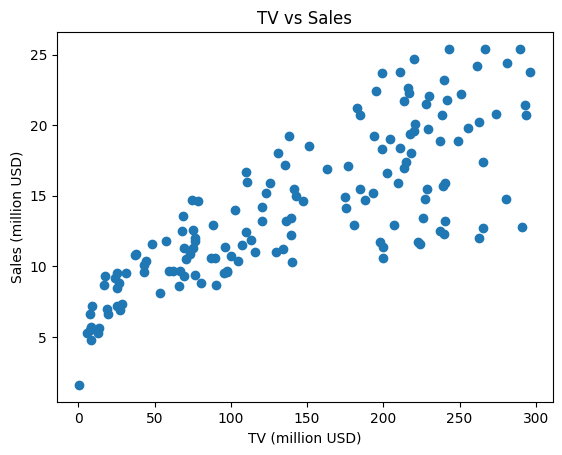

In [13]:
# TV vs Sales
#plt.subplot(1, 3, 1)
plt.scatter(df['TV(millionUSD)'], df['sales(millionUSD)'])
plt.title('TV vs Sales')
plt.xlabel('TV (million USD)')
plt.ylabel('Sales (million USD)')

### CSV Output

In [81]:
df.to_csv('example',index=False)

## Excel
Pandas can read and write excel files, keep in mind, this only imports data. Not formulas or images, having images or macros may cause this read_excel method to crash. 

### Excel Input

In [85]:
df1 = pd.read_excel('Prices_Metals.xlsx')
df1

,Date,gold,silver,plat,pall
0,1993-11-01,369.25,4.2500,367.20,128.75
1,1993-12-01,376.30,4.6200,374.00,124.00
2,1994-01-01,394.00,5.2400,399.00,126.25
3,1994-02-01,384.50,5.3100,393.00,128.25
4,1994-03-01,378.75,5.3200,392.50,136.10
...,...,...,...,...,...
226,2012-09-01,1692.33,32.1150,1551.55,631.38
227,2012-10-01,1775.43,34.6600,1679.20,644.85
228,2012-11-01,1714.20,32.2575,1571.03,612.45
229,2012-12-01,1715.96,33.6600,1605.85,690.00


### Excel Output

In [87]:
df1.to_excel('Excel_Sample.xlsx',sheet_name='Sheet1')